In [2]:
#Housing Burden and Poverty Status of Fire Affected Areas
#Gina Ranieri
#An analysis of census data of variables affecting poverty status and rent burden by race

In [3]:
#importing libraries

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [14]:
import os

In [4]:
#loading census file

In [34]:
census = os.path.join(os.getcwd(), 'CensusData_Poverty_RentBurden.csv')

In [44]:
df = pd.read_csv(
    'CensusData_Poverty_RentBurden.csv',
    dtype=
    {
        'FIPS':str,
        'STATE (FIPS Code)':str,
        'COUNTY of current residence': str
    }
)

In [40]:
#imported as a string to capture the leading zeroes

In [45]:
df.head()

,FIPS,State (FIPS Code),County of current residence,Census Tract,Geographic Identifier,Area Name,Tribal Tract,Renter-Occupied Housing Units,Renter-Occupied Housing Units: More than 10.0 Percent,Renter-Occupied Housing Units: More than 20.0 Percent,...,Two or More Races Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Two or More Races Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,% Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,% Two or More Races Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,% Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,% Hispanic or Latino Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level
0,06037101110,6,37,101110,1400000US06037101110,Census Tract 1011.10,NaN,760,680,575,...,780,168,612,21.54,78.46,1412,182,1230,12.89,87.11
1,06037101122,6,37,101122,1400000US06037101122,Census Tract 1011.22,NaN,311,250,250,...,281,55,226,19.57,80.43,413,0,413,0.00,100.00
2,06037101220,6,37,101220,1400000US06037101220,Census Tract 1012.20,NaN,761,675,548,...,626,137,489,21.88,78.12,1312,281,1031,21.42,78.58
3,06037101221,6,37,101221,1400000US06037101221,Census Tract 1012.21,NaN,1154,1140,1010,...,724,36,688,4.97,95.03,1428,166,1262,11.62,88.38
4,06037101222,6,37,101222,1400000US06037101222,Census Tract 1012.22,NaN,873,860,665,...,930,21,909,2.26,97.74,1274,34,1240,2.67,97.33


In [46]:
df.columns[df.isna().all()].tolist()

['Tribal Tract']

In [47]:
#I had already cleaned up the data some in Excel before uploading, here I am deleting the remaining empty columns

In [48]:
df = df.dropna(axis=1,how="all")

In [49]:
df.head()

,FIPS,State (FIPS Code),County of current residence,Census Tract,Geographic Identifier,Area Name,Renter-Occupied Housing Units,Renter-Occupied Housing Units: More than 10.0 Percent,Renter-Occupied Housing Units: More than 20.0 Percent,Renter-Occupied Housing Units: More than 30.0 Percent,...,Two or More Races Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Two or More Races Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,% Two or More Races Population for Whom Poverty Status Is Determined: Income Below Poverty Level,% Two or More Races Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,Hispanic or Latino Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level,% Hispanic or Latino Population for Whom Poverty Status Is Determined: Income Below Poverty Level,% Hispanic or Latino Population for Whom Poverty Status Is Determined: Income At or Above Poverty Level
0,06037101110,6,37,101110,1400000US06037101110,Census Tract 1011.10,760,680,575,399,...,780,168,612,21.54,78.46,1412,182,1230,12.89,87.11
1,06037101122,6,37,101122,1400000US06037101122,Census Tract 1011.22,311,250,250,217,...,281,55,226,19.57,80.43,413,0,413,0.00,100.00
2,06037101220,6,37,101220,1400000US06037101220,Census Tract 1012.20,761,675,548,329,...,626,137,489,21.88,78.12,1312,281,1031,21.42,78.58
3,06037101221,6,37,101221,1400000US06037101221,Census Tract 1012.21,1154,1140,1010,793,...,724,36,688,4.97,95.03,1428,166,1262,11.62,88.38
4,06037101222,6,37,101222,1400000US06037101222,Census Tract 1012.22,873,860,665,483,...,930,21,909,2.26,97.74,1274,34,1240,2.67,97.33


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 77 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   FIPS                                                                                                                                    2498 non-null   object 
 1   State (FIPS Code)                                                                                                                       2498 non-null   int64  
 2   County of current residence                                                                                                             2498 non-null   int64  
 3   Census Tract                                                   

In [51]:
#the data looks good! time to analyze and make maps

In [52]:
#going to create a subset of columns I want to analyze more closely

In [58]:
columns_to_keep = ['FIPS',
                   'Renter-Occupied Housing Units',
                   'Population for Whom Poverty Status Is Determined:',
                   'White Alone Population for Whom Poverty Status Is  Determined:',
                   'Black or African American Alone Population for  Whom Poverty Status Is Determined:',
                   'American Indian and Alaska Native Alone  Population for Whom Poverty Status Is Determined:',
                   'Asian Alone Population for Whom Poverty Status Is  Determined:',
                   'Native Hawaiian and Other Pacific Islander Alone  Population for Whom Poverty Status Is Determined:',
                   'Some Other Race Alone Population for Whom Poverty  Status Is Determined:',
                   'Two or More Races Population for Whom Poverty  Status Is Determined:',
                   'Hispanic or Latino Population for Whom Poverty  Status Is Determined:']

In [59]:
df2=df[columns_to_keep]

In [60]:
df2.head()

,FIPS,Renter-Occupied Housing Units,Population for Whom Poverty Status Is Determined:,White Alone Population for Whom Poverty Status Is Determined:,Black or African American Alone Population for Whom Poverty Status Is Determined:,American Indian and Alaska Native Alone Population for Whom Poverty Status Is Determined:,Asian Alone Population for Whom Poverty Status Is Determined:,Native Hawaiian and Other Pacific Islander Alone Population for Whom Poverty Status Is Determined:,Some Other Race Alone Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined:
0,06037101110,760,4068,2307,141,0,287,0,553,780,1412
1,06037101122,311,4166,3016,24,24,544,0,277,281,413
2,06037101220,761,3434,1704,10,87,490,0,517,626,1312
3,06037101221,1154,3881,1814,121,27,390,0,805,724,1428
4,06037101222,873,2564,1409,14,80,51,25,55,930,1274


In [61]:
#here is the count of people in each census tract that either rent or are considered inpoverished, broken down by race

<Axes: >

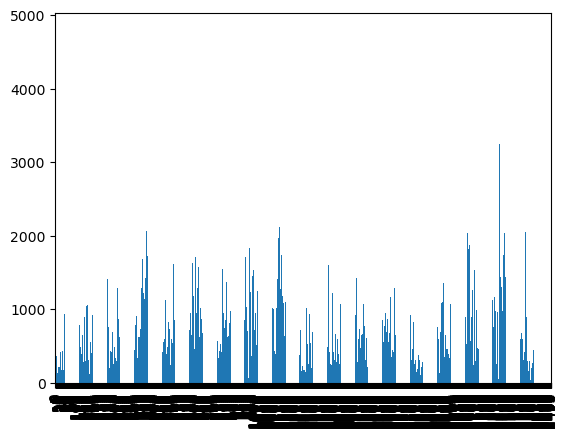

In [65]:
df2['Renter-Occupied Housing Units'].plot.bar(x='FIPS')

In [66]:
#distribution of renters in each census tract. It's messy but will be synthesized later

In [87]:
df_sorted = df2.sort_values(by='Renter-Occupied Housing Units', ascending=False)

In [88]:
df_sorted.head(25)

,FIPS,Renter-Occupied Housing Units,Population for Whom Poverty Status Is Determined:,White Alone Population for Whom Poverty Status Is Determined:,Black or African American Alone Population for Whom Poverty Status Is Determined:,American Indian and Alaska Native Alone Population for Whom Poverty Status Is Determined:,Asian Alone Population for Whom Poverty Status Is Determined:,Native Hawaiian and Other Pacific Islander Alone Population for Whom Poverty Status Is Determined:,Some Other Race Alone Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined:
2278,06037702900,4788,8844,6011,397,0,868,62,393,1113,899
606,06037207902,3908,7325,2359,752,159,2857,0,287,911,955
2239,06037700200,3791,6694,4349,82,47,225,0,548,1443,1731
2255,06037701402,3387,7304,4484,54,37,794,43,685,1207,1801
2264,06037701902,3360,5484,3937,290,17,384,0,136,720,422
1028,06037275604,3350,10233,6049,581,0,1746,0,283,1574,1217
2237,06037700101,3252,5536,3978,310,0,414,39,127,668,625
472,06037191000,3179,5335,2248,301,83,997,0,1346,360,1513
2025,06037576001,2877,5937,3050,756,150,692,0,331,958,1375
1496,06037463601,2864,6192,3330,388,11,1572,0,371,520,1067


In [90]:
#these are the twenty-five most populous renter-occupied census tracts, a proxy for housing burden

In [94]:
df_sorted2 = df2.sort_values(by='Population for Whom Poverty Status Is Determined:', ascending=False)

In [95]:
df_sorted2.head(10)

,FIPS,Renter-Occupied Housing Units,Population for Whom Poverty Status Is Determined:,White Alone Population for Whom Poverty Status Is Determined:,Black or African American Alone Population for Whom Poverty Status Is Determined:,American Indian and Alaska Native Alone Population for Whom Poverty Status Is Determined:,Asian Alone Population for Whom Poverty Status Is Determined:,Native Hawaiian and Other Pacific Islander Alone Population for Whom Poverty Status Is Determined:,Some Other Race Alone Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined:
2438,06037920121,787,10865,4494,1086,9,3498,55,267,1456,2196
1028,06037275604,3350,10233,6049,581,0,1746,0,283,1574,1217
69,06037108202,1031,10191,3320,1599,0,3624,144,413,1091,1061
2411,06037920035,692,8980,4488,291,105,257,0,1258,2581,5260
2453,06037920339,1270,8917,3692,663,79,1989,0,452,2042,2000
2278,06037702900,4788,8844,6011,397,0,868,62,393,1113,899
2406,06037920028,386,8700,3004,312,35,2027,0,730,2592,3289
2417,06037920043,378,8504,4125,534,74,1670,0,625,1476,2563
1207,06037401707,1192,8295,2261,420,86,1293,0,3082,1153,4895
1182,06037400304,1390,8164,3050,220,136,1821,85,1073,1779,3151


In [96]:
#these are the top ten census tracts for total impoverished population

<Axes: title={'center': 'Census Tracts with the Highest Population in Povery'}, xlabel='FIPS'>

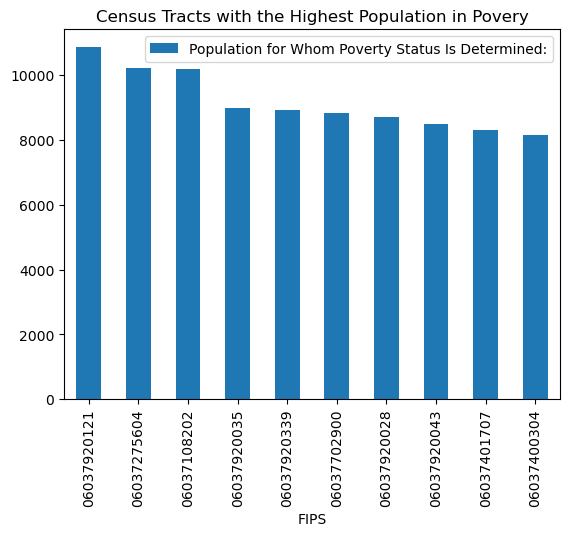

In [99]:
df_sorted2.head(10).plot.bar(x='FIPS', y='Population for Whom Poverty Status Is Determined:', title='Census Tracts with the Highest Population in Povery')

In [100]:
#now I am going to plot these on a map, by importing a GeoJSON

In [101]:
import geopandas as gpd

In [108]:
tracts = os.path.join(os.getcwd(), '2020_Census_Tracts.geojson')

In [109]:
tracts = gpd.read_file('2020_Census_Tracts.geojson')

In [110]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25..."


In [111]:
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2496 non-null   int32   
 1   CT20           2496 non-null   object  
 2   LABEL          2496 non-null   object  
 3   ShapeSTArea    2496 non-null   float64 
 4   ShapeSTLength  2496 non-null   float64 
 5   geometry       2496 non-null   geometry
dtypes: float64(2), geometry(1), int32(1), object(2)
memory usage: 107.4+ KB


In [112]:
#checking out the data

In [113]:
tracts['FIPS']='06'+'037'+tracts['CT20']

In [114]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25...",06037101222


In [115]:
#created a FIPS label to merge it with my census data

In [116]:
poverty_race_tracts=tracts.merge(df2, on="FIPS")

In [117]:
poverty_race_tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Renter-Occupied Housing Units,Population for Whom Poverty Status Is Determined:,White Alone Population for Whom Poverty Status Is Determined:,Black or African American Alone Population for Whom Poverty Status Is Determined:,American Indian and Alaska Native Alone Population for Whom Poverty Status Is Determined:,Asian Alone Population for Whom Poverty Status Is Determined:,Native Hawaiian and Other Pacific Islander Alone Population for Whom Poverty Status Is Determined:,Some Other Race Alone Population for Whom Poverty Status Is Determined:,Two or More Races Population for Whom Poverty Status Is Determined:,Hispanic or Latino Population for Whom Poverty Status Is Determined:
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,760,4068,2307,141,0,287,0,553,780,1412
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,311,4166,3016,24,24,544,0,277,281,413
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,761,3434,1704,10,87,490,0,517,626,1312
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1154,3881,1814,121,27,390,0,805,724,1428
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25...",06037101222,873,2564,1409,14,80,51,25,55,930,1274


In [118]:
#the two datasets are now merged

<Axes: >

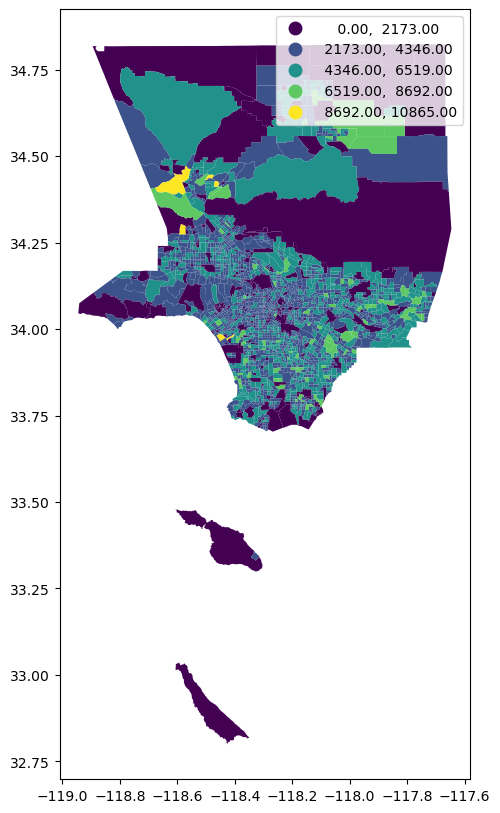

In [128]:
poverty_race_tracts.plot(column='Population for Whom Poverty Status Is Determined:', legend=True, scheme='equalinterval', figsize=(12,10))

In [129]:
#here is the chloropleth map of LA county of people in poverty. we can see that it spikes in Venice, just north of SFV, and near Santa Clarita